# N-Queens Problem

## Objective: Compare recursive backtracking and genetic algorithm approaches

### Recursive backtracking implementation

In [48]:
# Reference: https://reintech.io/blog/python-algorithms-solving-n-queen-problem

'''
Returns an empty NxN board (full of zeros)
'''
def generate_board(N):
  return [[0 for _ in range(N)] for _ in range(N)]

'''
Checks if the new Queen is under attack at this space
'''
def is_safe(board, row, col):
    # Row (only to the left)
    for i in range(col):
        if board[row][i] == 1:
            return False

    # Upper diagonal '\' (only to the left)
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    # Lower diagonal '/' (only to the left)
    for i, j in zip(range(row, N, 1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    return True


'''
Helper function for recursive backtracking
- Modifies board parameter with solved Queen placements
'''
def n_queens_helper(board, col):
    N = len(board[0])
    # Base case: All queens are placed
    if col >= N:
        return True

    # For this column, try placing the Queen in each row
    for row in range(N):
        if is_safe(board, row, col):
            board[row][col] = 1 # Place a Queen

            # Recursively backtrack
            if n_queens_helper(board, col + 1) == True:
                return True # Solution found

            board[row][col] = 0 # Remove that Queen

    # No solution found
    return False

'''
N-Queens solver
- Solves N-Queens problem using recursive backtracking
'''
def n_queens_recursive_backtracking(N):
  board = generate_board(N)
  n_queens_helper(board, 0)
  return board

### Genetic algorithm implementation

In [84]:
# Reference: https://www.educative.io/answers/solving-the-8-queen-problem-using-genetic-algorithm

import random

'''
Convert genetic algorithm board representation to 2D array representation
- For testing/comparision purposes
'''
def convert_flat_board_to_2d(flat_board):
  N = len(flat_board)
  board_2d = generate_board(N)

  for col, row_plus_1 in enumerate(flat_board):
    board_2d[row_plus_1 - 1][col] = 1

  return board_2d

'''
Initial start state
- Generate a random board state (index = column, value = row where Queen located)
'''
def generate_board_state(N):
    board_state = [random.randint(0, N - 1) for _ in range(N)]
    return board_state

'''
Calculate the fitness of a board state
- Fitness function: Add the number of non-attacking pairs for each queen
'''
def calculate_fitness(board_state):
    N = len(board_state)
    MAX_FITNESS = N * (N - 1) / 2
    conflicts = 0
    for i in range(N):
        for j in range(i + 1, N):
            if board_state[i] == board_state[j] or abs(board_state[i] - board_state[j]) == j - i:
                conflicts += 1
    return MAX_FITNESS - conflicts  # For 8-Queens: Max fitness = 28 (no conflicts)

'''
Selection
- Select parents for crossover (using tournament selection)
'''
def tournament_selection(population):
    tournament_size = 5
    tournament = random.sample(population, tournament_size)
    return max(tournament, key=lambda x: x[1])

'''
Crossover
- Crossover operation (single-point crossover)
'''
def crossover(parent1, parent2):
    N = len(parent1)
    crossover_point = random.randint(1, N - 1)
    child = parent1[:crossover_point] + parent2[crossover_point:]
    return child

'''
Mutation
- Mutation operation (swap two positions)
'''
def mutate(board_state):
    N = len(board_state)
    pos1, pos2 = random.sample(range(N), 2)
    board_state[pos1], board_state[pos2] = board_state[pos2], board_state[pos1]
    return board_state

'''
N-Queens solver
- Solves N-Queens problem using genetic algorithm
'''
def n_queens_genetic(N, POPULATION_SIZE=50, MUTATION_RATE=0.1, MAX_GENERATIONS=100):
  MAX_FITNESS = N * (N - 1) / 2

  # Initial population
  population = [(generate_board_state(N), 0) for _ in range(POPULATION_SIZE)]

  # Loop over generations...
  for generation in range(MAX_GENERATIONS):
      # Calculate fitness for each board state
      population = [(board_state, calculate_fitness(board_state)) for board_state, _ in population]

      # Check if solution is found
      best_board_state = max(population, key=lambda x: x[1])[0]
      if calculate_fitness(best_board_state) == MAX_FITNESS:
          #print("Solution found in generation", generation)
          break

      # Create the next generation
      new_population = []

      # Elitism: Keep the best board state from the previous generation
      new_population.append(max(population, key=lambda x: x[1]))

      # Perform selection, crossover, and mutation
      while len(new_population) < POPULATION_SIZE:
          parent1 = tournament_selection(population)
          parent2 = tournament_selection(population)
          child = crossover(parent1[0], parent2[0])
          if random.random() < MUTATION_RATE:
              child = mutate(child)
          new_population.append((child, 0))

      # Update the population
      population = new_population

  return best_board_state

### Compare the approaches
- Time each algorithm for multiple board sizes
- Run 5 trials for each combination and report the average

In [81]:
from time import time
import numpy as np

recursive_backtracking_runtime = {}
recursive_backtracking_stdev = {}

genetic_algorithm_runtime = {}
genetic_algorithm_stdev = {}

for N in range(8, 21, 2):
  # Recursive backtracking
  runtimes = []
  for _ in range(5):
    start = time()
    n_queens_recursive_backtracking(N)
    runtimes.append(time() - start)
  runtime = np.mean(runtimes)
  stdev = np.std(runtimes)
  recursive_backtracking_runtime[N] = runtime
  recursive_backtracking_stdev[N] = stdev
  print(f'Recurisve backtracking ({N}): {runtime} sec (+/- {stdev} sec)')

  # Genetic algorithm
  runtimes = []
  for _ in range(5):
    start = time()
    n_queens_genetic(N)
    runtimes.append(time() - start)
  runtime = np.mean(runtimes)
  stdev = np.std(runtimes)
  genetic_algorithm_runtime[N] = runtime
  genetic_algorithm_stdev[N] = stdev
  print(f'Genetic algorithm ({N}): {runtime} sec (+/- {stdev} sec)')

  print()

Recurisve backtracking (8): 0.0012406349182128907 sec (+/- 0.0002813718091380134 sec)
Genetic algorithm (8): 0.10436072349548339 sec (+/- 0.004463095853880588 sec)

Recurisve backtracking (10): 0.0012453556060791015 sec (+/- 0.00025457570013918425 sec)
Genetic algorithm (10): 0.12601613998413086 sec (+/- 0.006143037757943961 sec)

Recurisve backtracking (12): 0.003611898422241211 sec (+/- 4.151622636693276e-05 sec)
Genetic algorithm (12): 0.1481043815612793 sec (+/- 0.0017799373034289878 sec)

Recurisve backtracking (14): 0.033360862731933595 sec (+/- 0.0009429124098137607 sec)
Genetic algorithm (14): 0.17609214782714844 sec (+/- 0.004331912616407787 sec)

Recurisve backtracking (16): 0.21723170280456544 sec (+/- 0.007133043623345398 sec)
Genetic algorithm (16): 0.21280217170715332 sec (+/- 0.0076470266102314005 sec)

Recurisve backtracking (18): 1.5271340370178224 sec (+/- 0.4277595206762786 sec)
Genetic algorithm (18): 0.2531274795532227 sec (+/- 0.00568639925392268 sec)

Recurisve b

### Findings
- Plot the average algorithm runtimes vs the board size/number of queens (N)

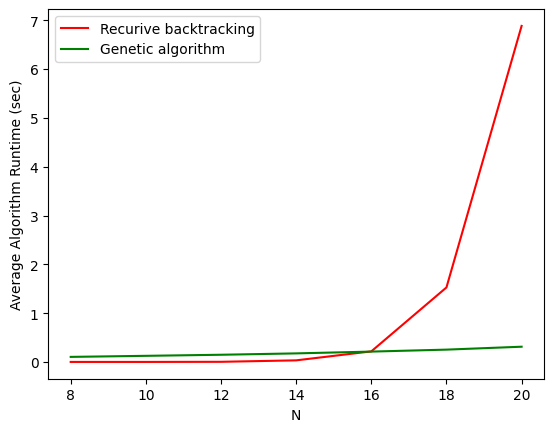

In [82]:
import matplotlib.pyplot as plt

# Plot average algorithm runtime vs. N
recursive_backtracking_runtime_sorted = sorted(recursive_backtracking_runtime.items()) # sorted by key, return a list of tuples
genetic_algorithm_runtime_sorted = sorted(genetic_algorithm_runtime.items())

recursive_backtracking_N, recursive_backtracking_runtime = zip(*recursive_backtracking_runtime_sorted) # unpack a list of pairs into two tuples
genetic_algorithm_N, genetic_algorithm_runtime = zip(*genetic_algorithm_runtime_sorted)

plt.plot(recursive_backtracking_N, recursive_backtracking_runtime, 'r')
plt.plot(genetic_algorithm_N, genetic_algorithm_runtime, 'g')

plt.xlabel('N')
plt.ylabel('Average Algorithm Runtime (sec)')

plt.legend(['Recurive backtracking', 'Genetic algorithm'], loc ="upper left")

plt.show()

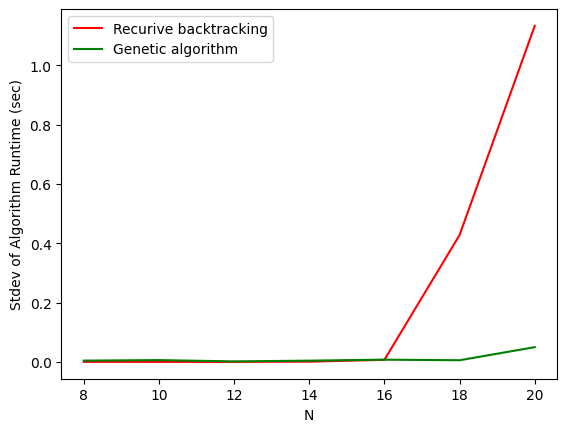

In [83]:
# Plot stdev of algorithm runtime vs. N
recursive_backtracking_stdev_sorted = sorted(recursive_backtracking_stdev.items()) # sorted by key, return a list of tuples
genetic_algorithm_stdev_sorted = sorted(genetic_algorithm_stdev.items())

recursive_backtracking_N, recursive_backtracking_stdev = zip(*recursive_backtracking_stdev_sorted) # unpack a list of pairs into two tuples
genetic_algorithm_N, genetic_algorithm_stdev = zip(*genetic_algorithm_stdev_sorted)

plt.plot(recursive_backtracking_N, recursive_backtracking_stdev, 'r')
plt.plot(genetic_algorithm_N, genetic_algorithm_stdev, 'g')

plt.xlabel('N')
plt.ylabel('Stdev of Algorithm Runtime (sec)')

plt.legend(['Recurive backtracking', 'Genetic algorithm'], loc ="upper left")

plt.show()

### Observations
- Identify and interpret any relationships observed

Recursive backtracking is slightly faster for small to medium N's (<= 16); however, the difference is marginal.
For large N's (> 16), the runtime of recursive backtracking grows very quickly.

On the other hand, the runtime of the genetic algorithm remains fairly flat/constant, even for large N's.

As such, we may conclude that a recursive backtracking approach is superior in terms of runtime when N is not large (<= 16) while a genetic algorithm approach is better for larger N's (> 16).

Furthermore, the variation in runtimes between trials for a given N remains fairly constant for all N's with the genetic algorithm. In contrast, while low when N is not large (<= 16), the variation in runtime increasly quickly for the recursive backtracking approach for larger N's (> 16).

This suggests that, while there does not appear to be much difference in runtime consistency between the approaches when N is not large (<= 16), the genetic algorithm is much less volatile in terms of runtime when N is large (> 16), making it a safer choice.

In summary, the **genetic algorithm outperforms recursive backtracking when N is large (> 16) in terms of both absolute and consistency of runtime performance**. For N's that are not large (<= 16), recursive backtracking performs slightly better; however, there does not appear to be much difference in performance.